In [1]:
from math import floor, ceil
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# return [B,G,R,A]
def get_pixel(y, x, src):
    if (x<0 or y<0 or x>src.shape[1]-1 or y>src.shape[0]-1): # out of frame
        return [0,0,0,0]
    xt, yt = x-int(x), y-int(y)
    #print(xt,yt)
    u, d, l, r = floor(y), ceil(y), floor(x), ceil(x)
    ul, ur, dl, dr = src[u][l], src[u][r], src[d][l], src[d][r]
    bgr = np.zeros(3)
    bgr += ul * xt     * yt
    bgr += ur * (1-xt) * yt
    bgr += dl * xt     * (1-yt)
    bgr += dr * (1-xt) * (1-yt)
    return np.concatenate([bgr,[1]])

In [3]:
# magniture of vector
def mag(x):
    return np.sqrt(x.dot(x))
# angle is clockwise or counterclockwise
def cross_direction(x, y):
    return np.sign(x[0]*y[1]-x[1]*y[0])
# project y on x , ratio of x
def projection_factor(x, y):
    return x.dot(y) / x.dot(x)

In [4]:
a, b, p = 0.01, 2, 1
def morph(dest, src):
    pairs = [[(0,0),(0,300),(0,0),(180,240)],[(100,0),(400,0),(90,10),(350,90)]] # srcP,srcQ,destP,destQ
    for i in range(len(pairs)):
        for j in range(4): pairs[i][j] = np.array(pairs[i][j])
    for y in range(dest.shape[0]):
        for x in range(dest.shape[1]):
            X = np.array([x,y])
            X_s = np.zeros(2)
            weights = 0
            for pair in pairs:
                PQ = pair[3]-pair[2]
                P_Q_ = pair[1]-pair[0]
                u = projection_factor(PQ, X-pair[2]) # scalar, u*PQ is the actual u
                v = X-pair[2]-u*PQ
                v_ = P_Q_[::-1]*np.array([-1,1])/mag(PQ) * mag(v)*cross_direction(PQ,X-pair[2])
                X_ = (pair[0]*(1-u) + pair[1]*u) + v_
                #print(X, X_, u,v, v_, cross_direction(PQ,X-pair[2]))
                weight = (mag(PQ)**p/(a+mag(v)))**b
                X_s += (X_-X) * weight
                weights += weight
            X_s = X + X_s/weights
            dest[y][x] = get_pixel(X_s[1], X_s[0], src)[0:3]

In [5]:
source = cv2.imread('./img/people_bunch.jpg')
destination = np.zeros(source.shape).astype(np.uint8)
print(source.shape) # (height, width, BGR)
morph(destination, source)

(700, 1050, 3)


In [6]:
cv2.imshow('image', source)
cv2.waitKey(0)
cv2.imshow('image', destination)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('./output.jpg', destination)

True

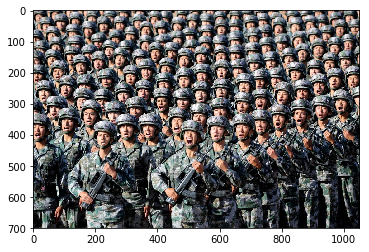

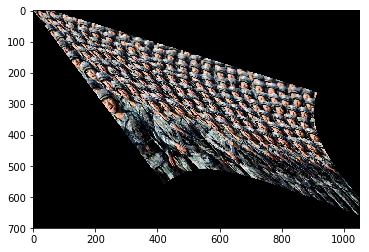

In [7]:
plt.imshow(cv2.cvtColor(source, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(destination, cv2.COLOR_BGR2RGB))
plt.show()